In [ ]:
import pandas as pd
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.info()

In [ ]:
summary.columns

Pertinent columns:

* TUFINLWGT - statistical weight of respondent
* TRYHHCHILD - age of youngest child in household
* TEAGE - age of respondent
* TESEX - sex of respondent
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

In [ ]:
summary.head()

In [ ]:
adults_crit = summary.TEAGE >= 18
no_children_crit = summary.TRCHILDNUM == 0

In [ ]:
adults = summary[adults_crit]
adults.info()

In [ ]:
people_with_no_children = summary[no_children_crit]
people_with_no_children.info()

In [ ]:
adults_with_no_children = summary[adults_crit & no_children_crit]
adults_with_no_children.info()

In [ ]:
data = adults_with_no_children[['TUFINLWGT', 't120303']]
data = data.rename(columns={"TUFINLWGT": "weight", "t120303": "minutes"})
data.head()

In [ ]:
data['weighted_minutes'] = data.weight * data.minutes

In [ ]:
data.head()

In [ ]:
# Minutes on average spent watching TV (unweighted) - DO NOT USE
data.minutes.sum() / len(data)

In [ ]:
# Minutes on average spent watching TV (weighted)
data.weighted_minutes.sum() / data.weight.sum()

In [ ]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [ ]:
sleeping = average_minutes(adults_with_no_children, "010101")
sleepless = average_minutes(adults_with_no_children, "010102")
(sleeping + sleepless) / 60 # hours

In [ ]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [ ]:
activity_columns(summary, "0101")

In [ ]:
def average_minutes2(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [ ]:
average_minutes2(adults_with_no_children, "0101") / 60

In [ ]:
average_minutes2(adults_with_no_children, "01") / 60

In [ ]:
# grouping
help(adults_with_no_children.groupby)

## Joining files

In [ ]:
respondents = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat")
activities = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")

In [ ]:
respondents.info()

In [ ]:
activities.info()

In [ ]:
respondents.head()

In [ ]:
activities.head()

In [ ]:
merged = pd.merge(respondents, activities, left_on="TUCASEID", right_on="TUCASEID")
merged.info()

In [ ]:
merged[["TUCASEID", "TUACTIVITY_N", "TXTCOC"]].head()

In [ ]:
telfs = pd.Series({1: "Employed - at work",
                   2: "Employed - absent",
                   3: "Unemployed - laid off",
                   4: "Unemployed - looking",
                   5: "Not in labor force"})

In [ ]:
telfs

In [ ]:
summary.TELFS.map(telfs)

In [ ]:
working = summary[["t120303","t120308","t120101","t120301"]]
working.columns = ["Watching_TV", "Computer For Leasure", "Social for Fun", "Relax and Think"]

In [ ]:
working.plot()
d = {"Watching TV AVG" :average_minutes(summary, '120303'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}
print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar")

In [ ]:
d = {"Watching TV AVG" :average_minutes(summary, '120303'),"Video Games":average_minutes(summary, '120307'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}
print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar")

ERROR! Session/line number was not unique in database. History logging moved to new session 61


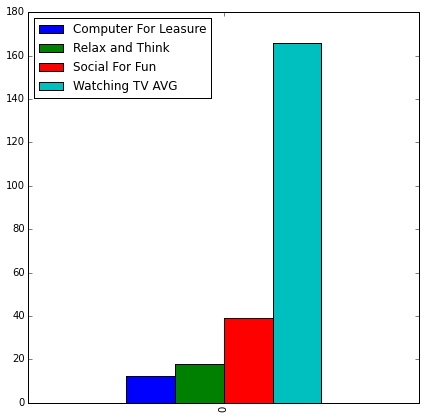

In [202]:
working
def aboveaverage(tv):
    if tv > 165.9:
        return tv
    else:
        return None
#aboveaveragetv = working['Watching_TV'].apply(aboveaverage)
#print(aboveaveragetv.head())
#working = pd.merge(working, aboveaveragetv.to_frame(), right_index=True, left_index=True)
working = working.dropna()
#print(working.head())
#working = working[["Watching_TV_x", "Computer For Leasure", "Social for Fun", "Relax and Think"]]
d = {"Watching TV AVG" :average_minutes(summary, '120303'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}

#print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar", figsize=(7,7))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12171aba8>], dtype=object)

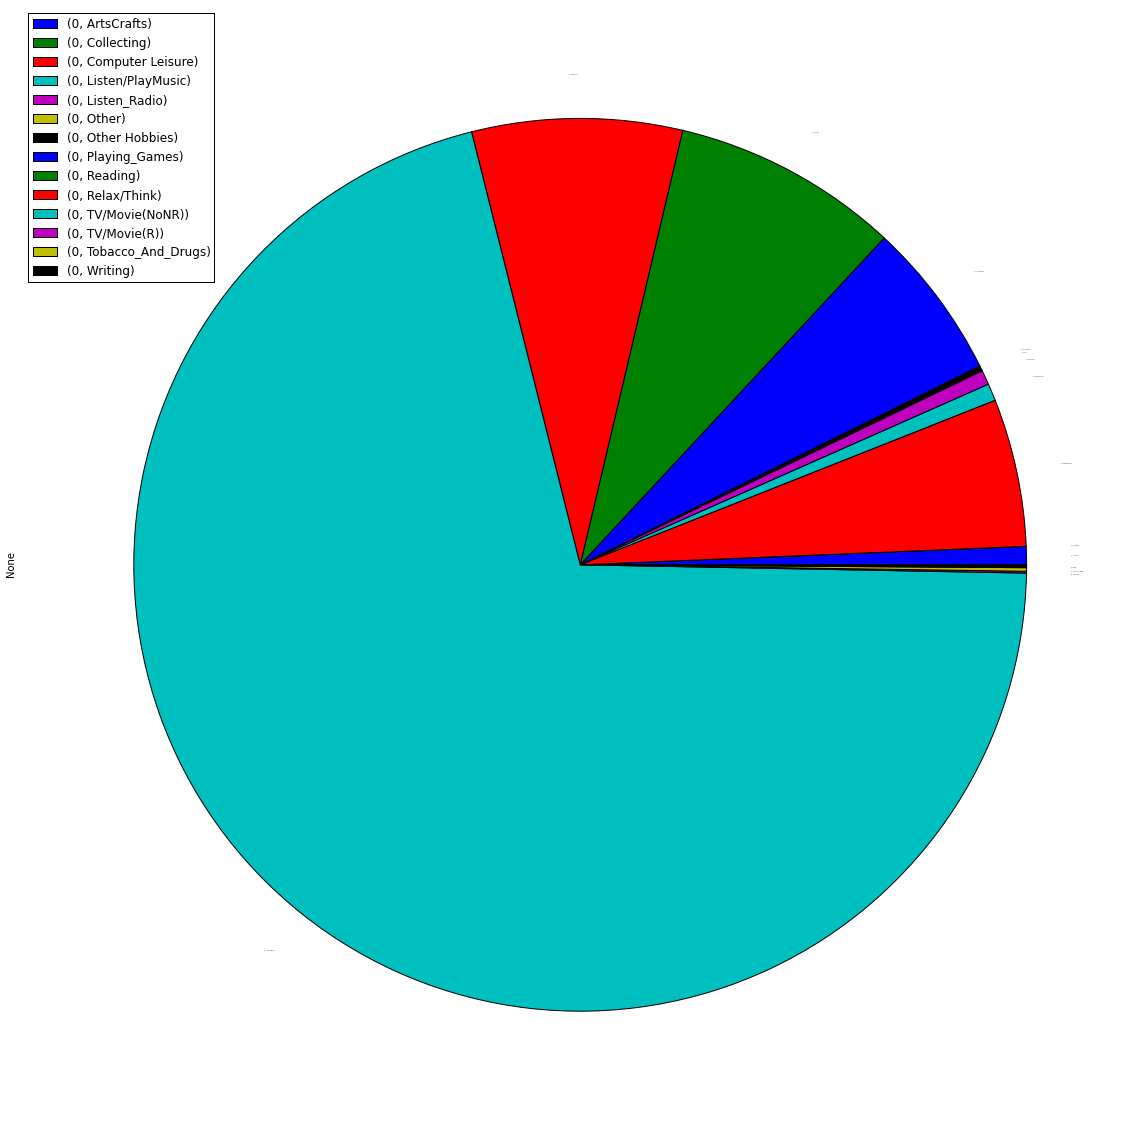

In [244]:
fun = summary[activity_columns(summary, '1203')]
d = {"Relax/Think" :average_minutes(summary, '120301'), "Tobacco_And_Drugs" :average_minutes(summary, '120302'), "TV/Movie(NoNR)": average_minutes(summary, '120303'), "TV/Movie(R)": average_minutes(summary, '120304'), "Listen_Radio": average_minutes(summary, '120305'), "Listen/PlayMusic": average_minutes(summary, '120306'),"Playing_Games": average_minutes(summary, '120307'),"Computer Leisure": average_minutes(summary, '120308'),"ArtsCrafts": average_minutes(summary, '120309'),"Collecting": average_minutes(summary, '120310'),"Other Hobbies": average_minutes(summary, '120311'),"Reading": average_minutes(summary, '120312'),"Writing": average_minutes(summary, '120313'),"Other": average_minutes(summary, '120399')}
fullfun = pd.DataFrame(d, range(1))
#fullfun.plot(kind='pie', subplots=True, figsize=(90, 10))
stackfull = fullfun.stack()
stackfull.plot("pie",  subplots=True, figsize=(20, 20), fontsize=.0001, legend=True)